In [26]:
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from os import listdir
from os.path import isfile, join
import librosa
import librosa.display
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.image  as mpimg
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [75]:
# train0_path = '../data/gan/0/gan_generated_engiin_X_train.csv'
# train1_path = '../data/gan/1/gan_generated_X_train.csv'
# test0_path = '../data/gan/0/gan_generated_engiin_X_test.csv'
# test1_path = '../data/gan/1/gan_generated_X_test.csv'

train0_path = '../data/gan/new/gan_generated_engiin_X_train.csv'
train1_path = '../data/gan/new/gan_generated_cough_X_train.csv'
test0_path = '../data/gan/new/gan_generated_engiin_X_test.csv'
test1_path = '../data/gan/new/gan_generated_cough_X_test.csv'

In [76]:
df_train0 = pd.read_csv(train0_path)
df_train0['y'] = 0
df_train1 = pd.read_csv(train1_path)
df_train1['y'] = 1
df_test0 = pd.read_csv(test0_path)
df_test0['y'] = 0
df_test1 = pd.read_csv(test1_path)
df_test1['y'] = 1

In [77]:
df_test0.shape, df_test1.shape, df_train0.shape, df_train1.shape

((400, 32), (250, 32), (1500, 32), (700, 32))

In [78]:
combined_df = pd.concat([df_train0, df_train1], ignore_index=True)
train_df = shuffle(combined_df, random_state=42)
combined_df = pd.concat([df_test0, df_test1], ignore_index=True)
test_df = shuffle(combined_df, random_state=42)

In [89]:
train_df.shape

(2200, 32)

In [90]:
train_df['y']

1451    0
1334    0
1761    1
1735    1
1576    1
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: y, Length: 2200, dtype: int64

In [79]:
y_train = train_df['y']
x_train = train_df.drop(columns = ['y'])
y_test = test_df['y']
x_test = test_df.drop(columns = ['y'])

In [80]:
train_df.shape

(2200, 32)

In [81]:
test_df.shape

(650, 32)

In [ ]:
num_labels = 2
filter_size = 3

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape = input_shape, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(1, activation='sigmoid')) 
        
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (31, ) # Shape for CNN
model = create_model(input_shape)

c:\Users\home\anaconda3\envs\dxcup\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
num_epochs = 10
num_batch_size = 2
history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.3)

Epoch 1/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9983 - loss: 0.0127 - val_accuracy: 0.3333 - val_loss: 0.5501
Epoch 2/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6602 - loss: 0.9344 - val_accuracy: 1.0000 - val_loss: 0.1859
Epoch 3/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6664 - loss: 0.4908 - val_accuracy: 1.0000 - val_loss: 0.1866
Epoch 4/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6660 - loss: 0.4802 - val_accuracy: 1.0000 - val_loss: 0.2145
Epoch 5/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6760 - loss: 0.4515 - val_accuracy: 1.0000 - val_loss: 0.1813
Epoch 6/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6927 - loss: 0.4417 - val_accuracy: 1.0000 - val_loss: 0.2011
Epoch 7/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6711 - loss: 0.4684 - val_accuracy: 1.0000 - val_loss: 0.2126
Epoch 8/10
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6627 - loss: 0.4739 - val_accuracy: 1.

<Figure size 640x480 with 0 Axes>

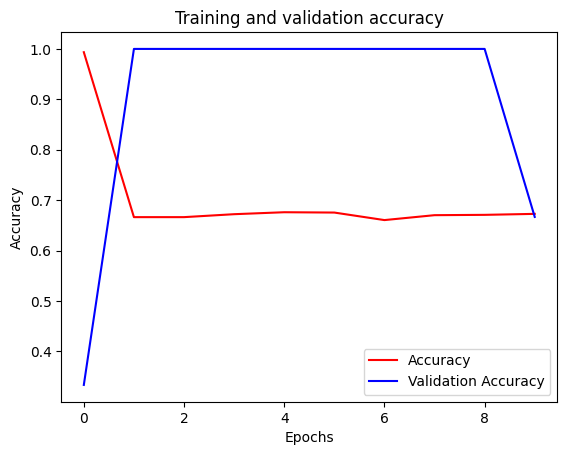

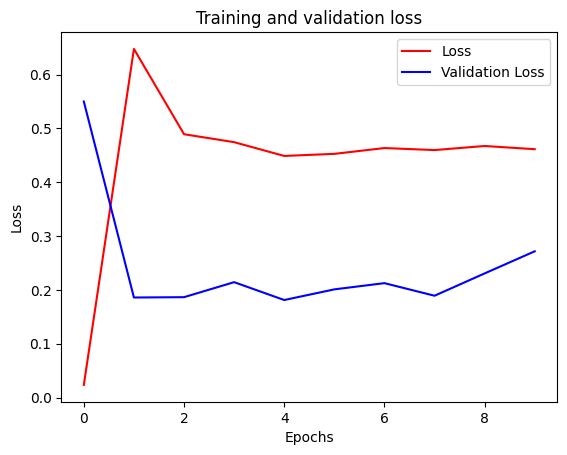

<Figure size 640x480 with 0 Axes>

In [112]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.62
F1 Score: 0.00
Precision: 0.00
Recall: 0.00


c:\Users\home\anaconda3\envs\dxcup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


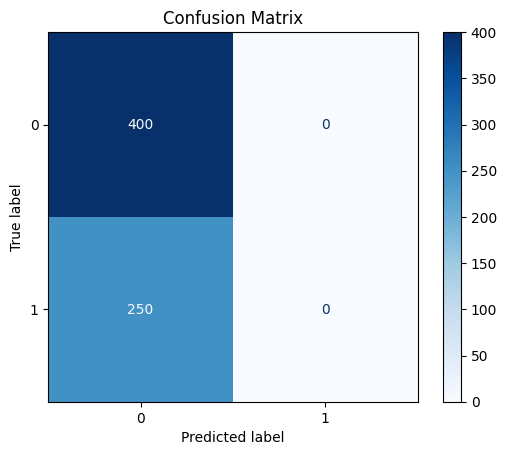

In [111]:
pred = model.predict(x_test)
threshhold = 0.5
pred = [1 if pr>threshhold else 0 for pr in pred]
# Calculate the metrics
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
conf_matrix = confusion_matrix(y_test, pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [109]:
pred = model.predict(x_train)

# Calculate the metrics
accuracy = accuracy_score(y_train, pred)
f1 = f1_score(y_train, pred)
precision = precision_score(y_train, pred)
recall = recall_score(y_train, pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
conf_matrix = confusion_matrix(y_train, pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets